In [1]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))
print(loc.shape)

318
312
311
310
310
(310,)


In [3]:
target = np.loadtxt('../proxy/cluster/GXsub_DM_InL_rcin200_100000_TMP.txt')[loc]

JeansE = np.loadtxt('../proxy/JeansE_DM_lnL_rcin200_n100000_bin20_boot200')[loc]

maind = np.loadtxt('../proxy/GadgetX_DS_main')
maind = maind[loc,1:]

fbest = np.append(maind, JeansE.reshape(310,1), axis = 1)
fbest0 = maind * 1

In [4]:
Nsam = 310
indices = np.arange(Nsam)
predt = np.zeros((Nsam))
time = np.zeros(Nsam)
oob = np.zeros(50)
for j in range(50):
    x_train,x_test,y_train,y_test,idx_train,idx_test = train_test_split(JeansE.reshape(310,1), target, indices, test_size=0.3, random_state=j)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=j,  oob_score = True)
    forest.fit(x_train, y_train)
    oob[j] = forest.oob_score_
    predt[idx_test] += forest.predict(x_test)
    time[idx_test] += 1
predt = predt / time
print(np.mean(oob))


0.793081286674528


<IPython.core.display.Javascript object>


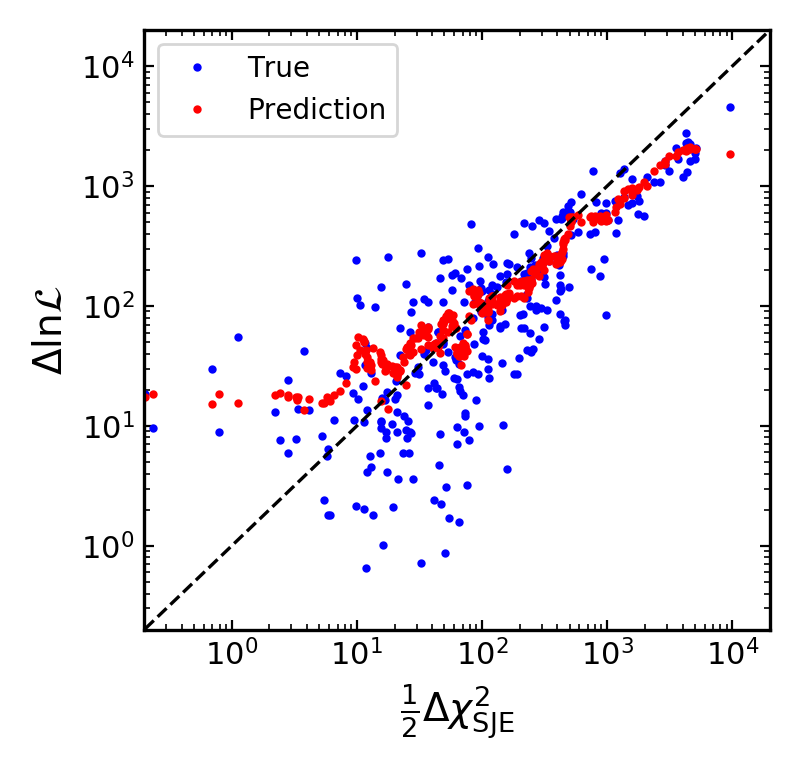

In [12]:
plt.figure(figsize = (4.0,3.9))

xx = np.logspace(-1,5,100)
plt.plot(JeansE/2,target, '.', color = 'b', label = 'True', ms = 4)

xx = np.logspace(-1,5,100)
plt.plot(JeansE/2,predt, '.', color = 'red', label = 'Prediction', ms = 4)
plt.plot(xx,xx,'k--', lw = 1.2)

plt.loglog()
plt.xlim(2e-1,2e4)
plt.ylim(2e-1,2e4)

plt.xlabel(r'$\frac{1}{2}\Delta \chi^2_{\rm SJE}$', fontsize = 14)
plt.ylabel(r'$\Delta \ln \mathcal{L}$', fontsize = 14)
# plt.text(1,1e4,'min_samples_leaf = 2')

plt.legend()
bwith = 1.2 #边框宽度设置为2
ax = plt.gca()#获取边框
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
plt.tick_params(top = 'on', right = 'on', which='both', direction = 'in', labelsize = 11)
plt.tight_layout()

plt.savefig('./figs/error.pdf')

<IPython.core.display.Javascript object>


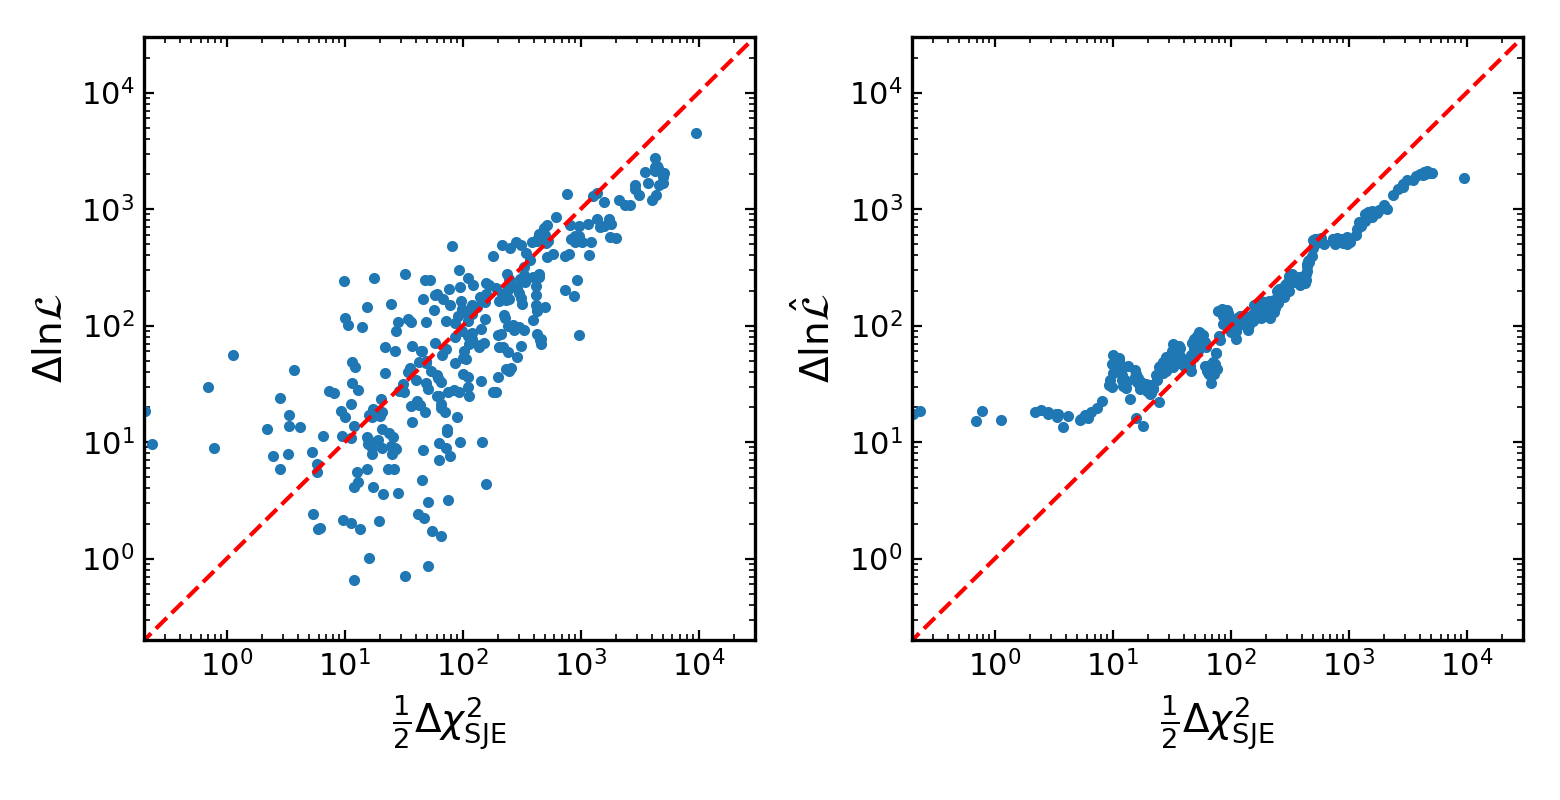

In [9]:
# plt.figure(figsize = (7.8,4))


# plt.subplot(121)
# xx = np.logspace(-1,5,100)
# plt.plot(JeansE/2,target, '.')
# plt.plot(xx,xx,'r--')

# plt.loglog()
# plt.xlim(2e-1,3e4)
# plt.ylim(2e-1,3e4)

# plt.xlabel(r'$\frac{1}{2}\Delta \chi^2_{\rm SJE}$', fontsize = 14)
# plt.ylabel(r'$\Delta \ln \mathcal{L}$', fontsize = 14)

# plt.tight_layout()
# bwith = 1.2 #边框宽度设置为2
# ax = plt.gca()#获取边框
# ax.spines['bottom'].set_linewidth(bwith)
# ax.spines['left'].set_linewidth(bwith)
# ax.spines['top'].set_linewidth(bwith)
# ax.spines['right'].set_linewidth(bwith)
# plt.tick_params(top = 'on', right = 'on', which='both', direction = 'in', labelsize = 11)
# #-----------------------------------------------------------
# plt.subplot(122)


# xx = np.logspace(-1,5,100)
# plt.plot(JeansE/2,predt, '.')
# plt.plot(xx,xx,'r--')

# plt.loglog()
# plt.xlim(2e-1,3e4)
# plt.ylim(2e-1,3e4)

# plt.xlabel(r'$\frac{1}{2}\Delta \chi^2_{\rm SJE}$', fontsize = 14)
# plt.ylabel(r'$\Delta \ln \hat{\mathcal{L}}$', fontsize = 14)
# # plt.text(1,1e4,'min_samples_leaf = 2')

# plt.tight_layout()
# bwith = 1.2 #边框宽度设置为2
# ax = plt.gca()#获取边框
# ax.spines['bottom'].set_linewidth(bwith)
# ax.spines['left'].set_linewidth(bwith)
# ax.spines['top'].set_linewidth(bwith)
# ax.spines['right'].set_linewidth(bwith)
# plt.tick_params(top = 'on', right = 'on', which='both', direction = 'in', labelsize = 11)

# plt.savefig('./figs/error.pdf')

<IPython.core.display.Javascript object>


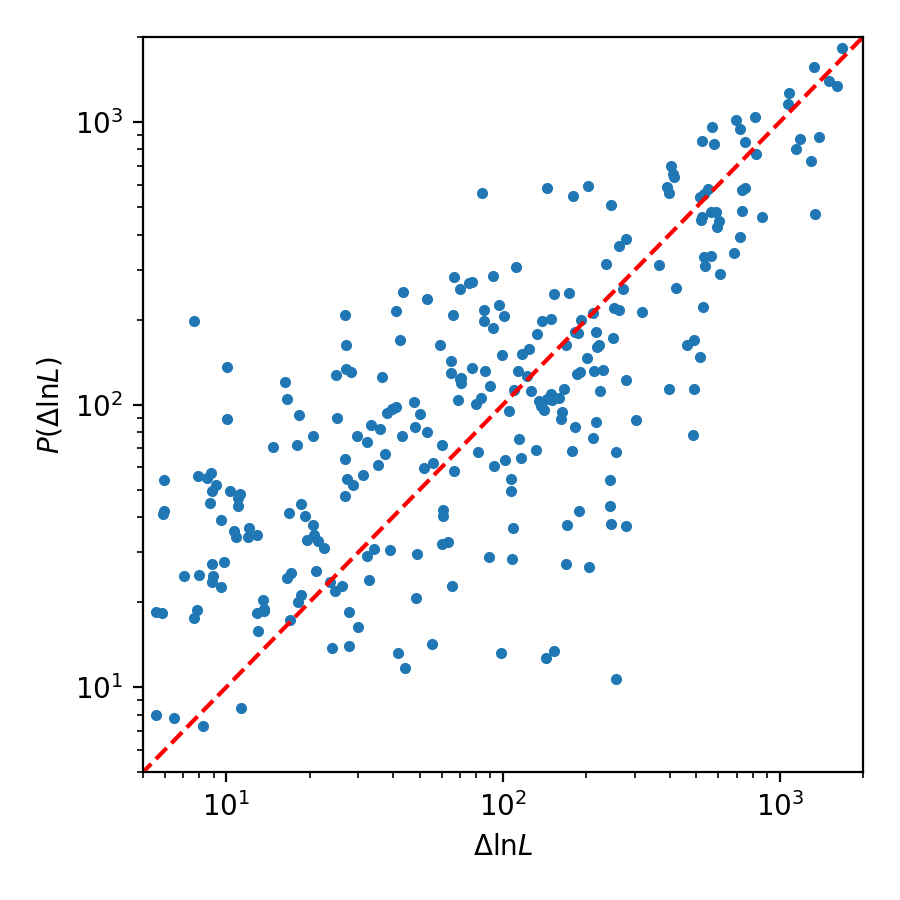

In [20]:
# plt.figure(figsize = (4.5,4.5))

# xx = np.logspace(0,4,100)
# plt.plot(target, predt,'.')
# plt.plot(xx,xx,'r--')

# plt.loglog()
# plt.xlim(5e0,2e3)
# plt.ylim(5e0,2e3)

# plt.xlabel(r'$\Delta \ln L$')
# plt.ylabel(r'$P(\Delta \ln L)$')

# plt.tight_layout()

<IPython.core.display.Javascript object>


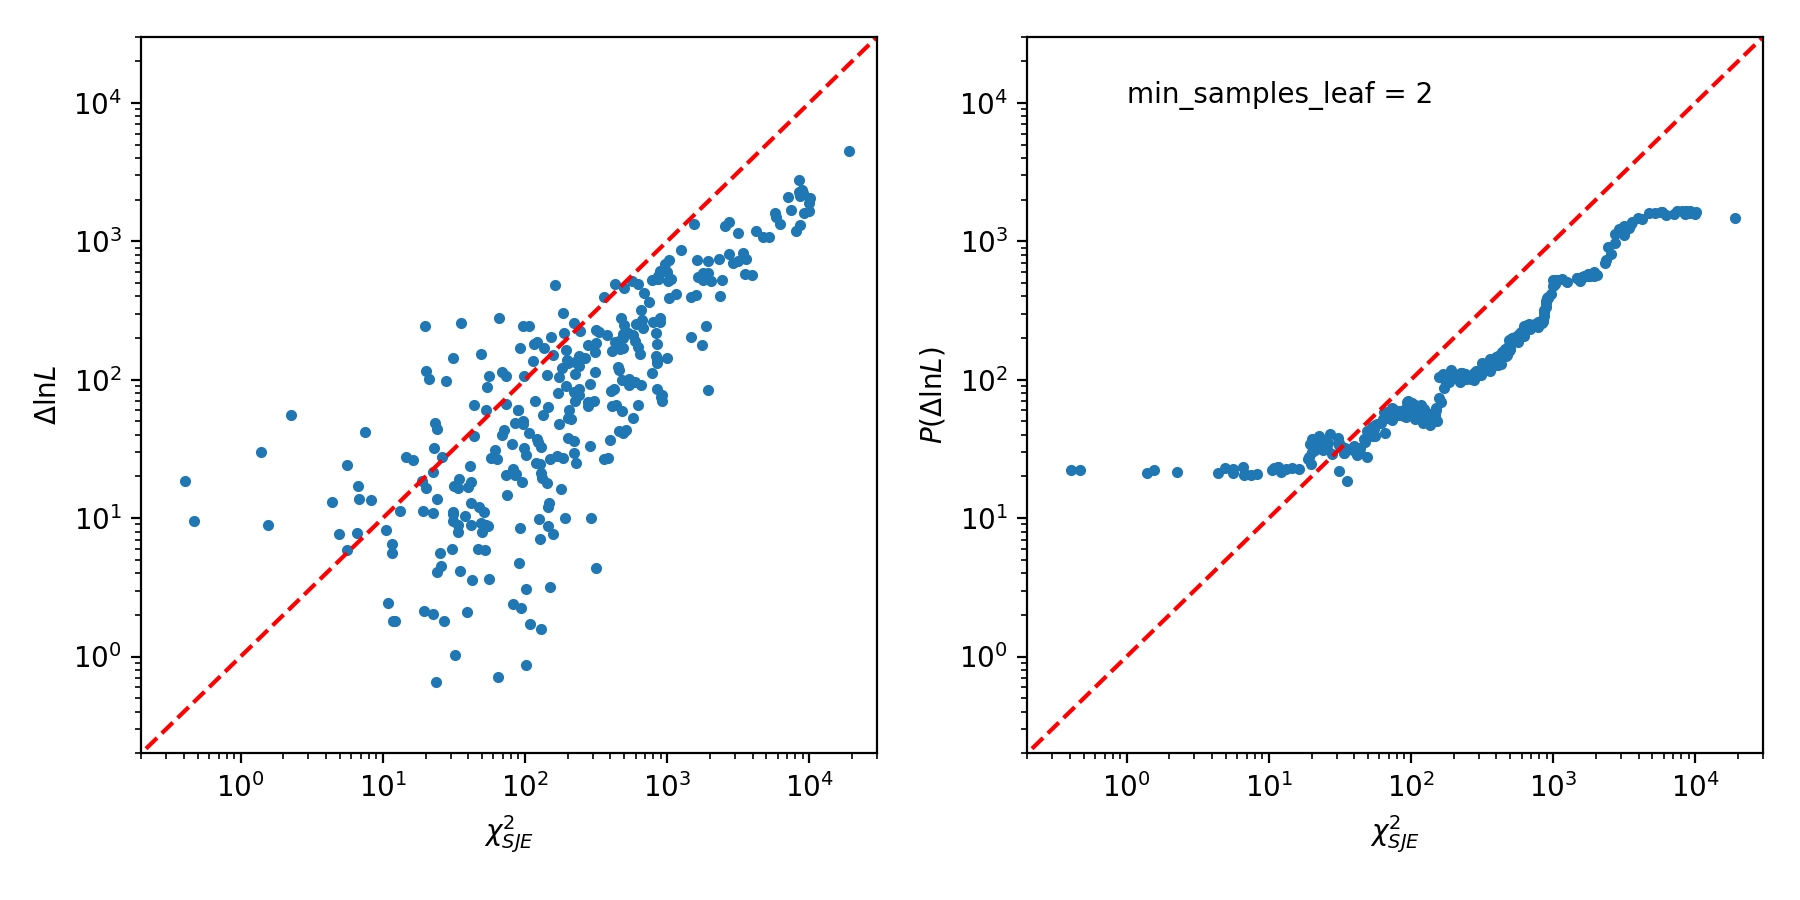